# Data Collection and Data Cleaning Demo

## Collect from twitter

In [ ]:
# import tweepy
import tweepy as tw

# your Twitter API key and API secret
my_api_key = 'ahipJjsjSt3A8V3LtUwSHZiYk'
my_api_secret = 'EtdFULW1SDE9lGxTEtXPNm9epCjEExJaujOeoTcXsbvcneieOl'

# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In this part we use tweepy api to get the matedata from twitter

In [ ]:
# get tweets from the API
tweets_copy = []
for tweet in tw.Cursor(api.search_tweets,q="feel so happy",lang='en').items(5000):
     tweets_copy.append(tweet)

# store the API responses in a list

    
print("Total Tweets fetched:", len(tweets_copy))

Because Twitter API search_tweets only give the abbreviatory text so use **get_status method** to get full_text

In [ ]:
import pandas as pd
import time

# intialize the dataframe
tweets_df = pd.DataFrame()
# populate the dataframe
for tweet in a:
    try:
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        text=tweet.text
    
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name,
                                               'date': tweet.created_at,
                                               'text': text},index=[0]))
    tweets_df = tweets_df.reset_index(drop=True)

# show the dataframe
tweets_df.head()

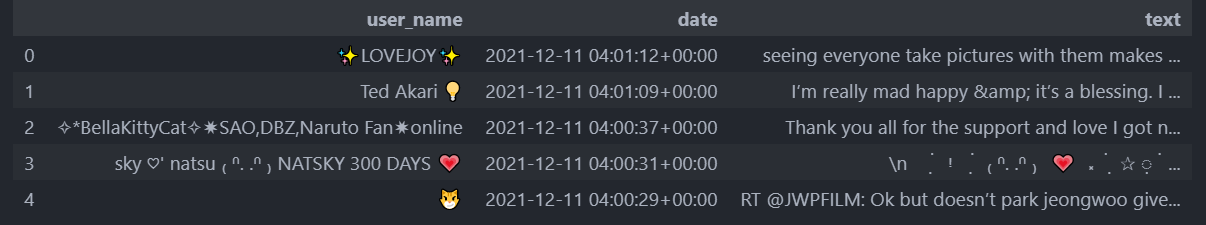

Store as CSV

In [ ]:
tweets_df.to_csv('6.csv')

## Simple Data Cleaning

Because the collected data is searched based on keywords, there is a lot of dirty data and duplicate data

### Data preview

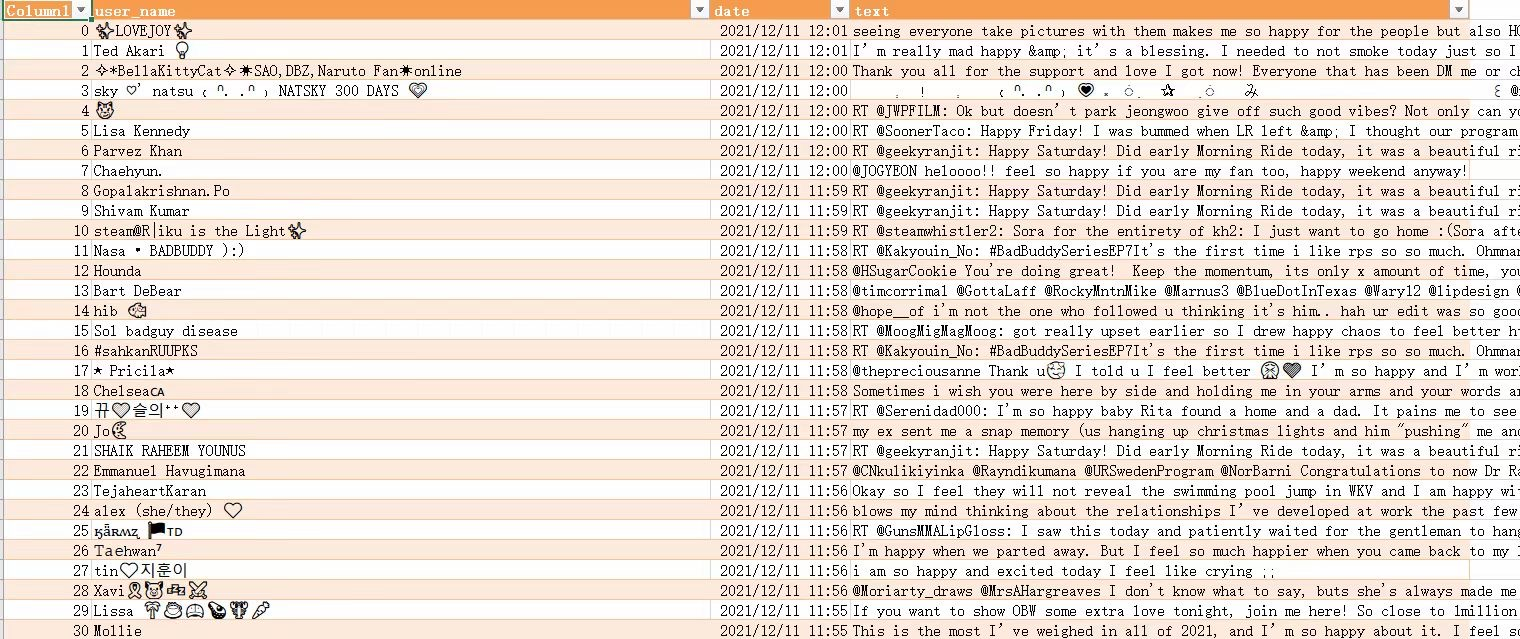

1. We can see that there are a lot of usernames @ tags in the tweets, which is not meaningful for our data analysis
2. We also consider removing punctuation, numbers and even special characters, which do nothing to distinguish between different comments.
3. We considered removing short words, which are not usually useful in natural language analysis
4. Because the collected data is searched based on keywords, there is a lot of not really happy text

### clean the dirty data
This step goal to delete the not really happy data and duplicate text

#### clean not really happy text

Here we use Text2Emotion to analyze the text

##### Text2Emotion
Text2Emotion is the python package that will assist you to pull out the emotions from the content.
Processes any textual data, recognizes the emotion embedded in it, and provides the output in the form of a dictionary :Happy, Angry, Sad, Surprise, and Fear.

text2motion will automatically clean the data and perform sentiment prediction, so we don't need to preprocess our DataGripProjects

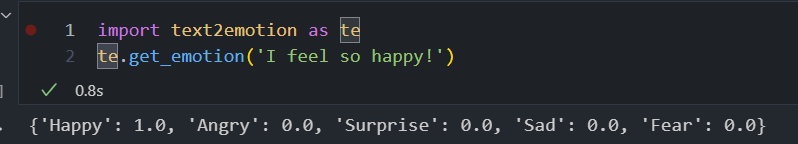

In [ ]:
# Judge how happy each tweet is
import pandas as pd
a=pd.read_csv('6.csv')
a['happyLeval']=None
for i in range(len(a['text'])):
    a['happyLeval'][i]=te.get_emotion(a['text'][i])['Happy']

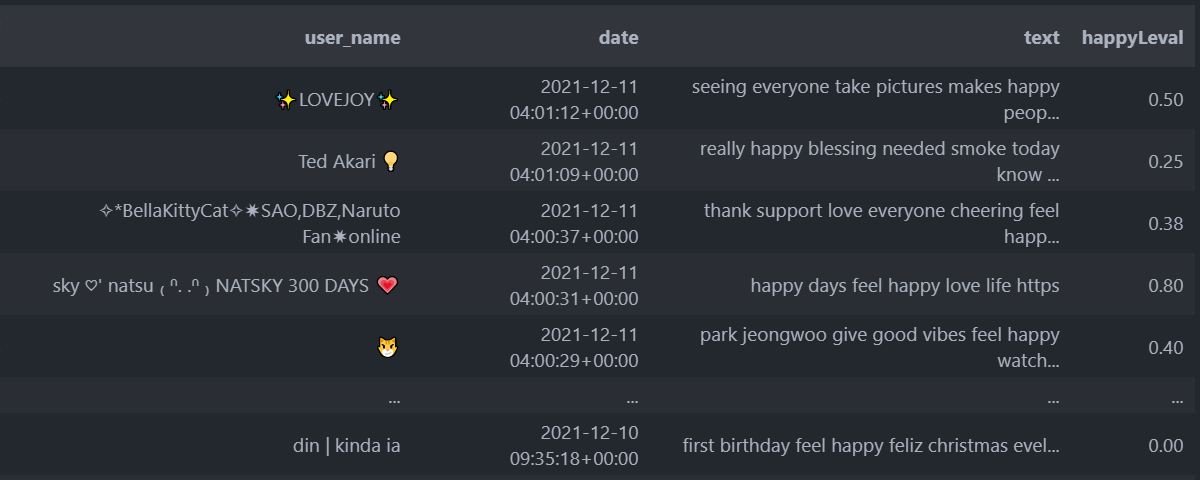

After manual inspection, we found that when the happy index is above 0.3, it can basically be regarded as real happiness

In [ ]:
a1=a[a['happyLeval']>0.3]
a1.to_excel('14.xlsx')

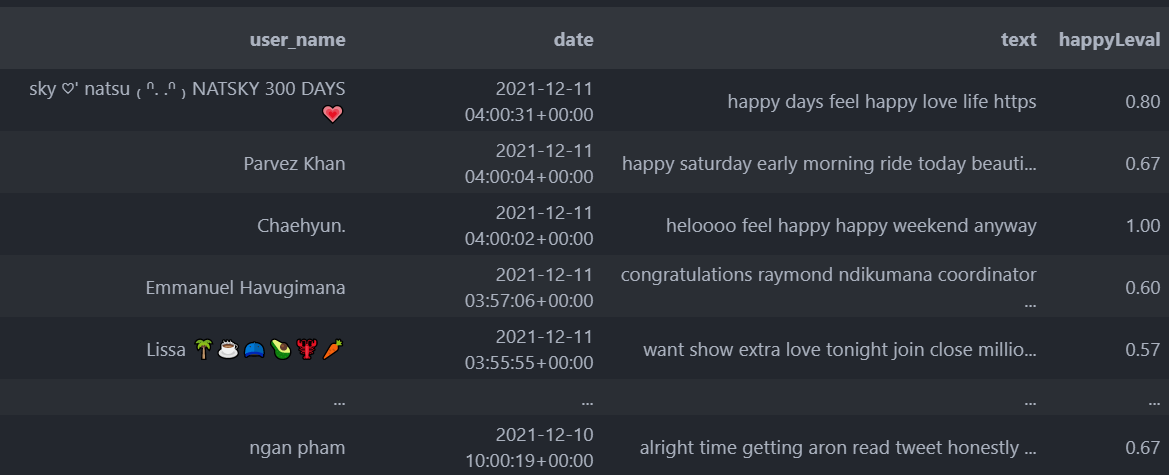

#### Clean the tweet text

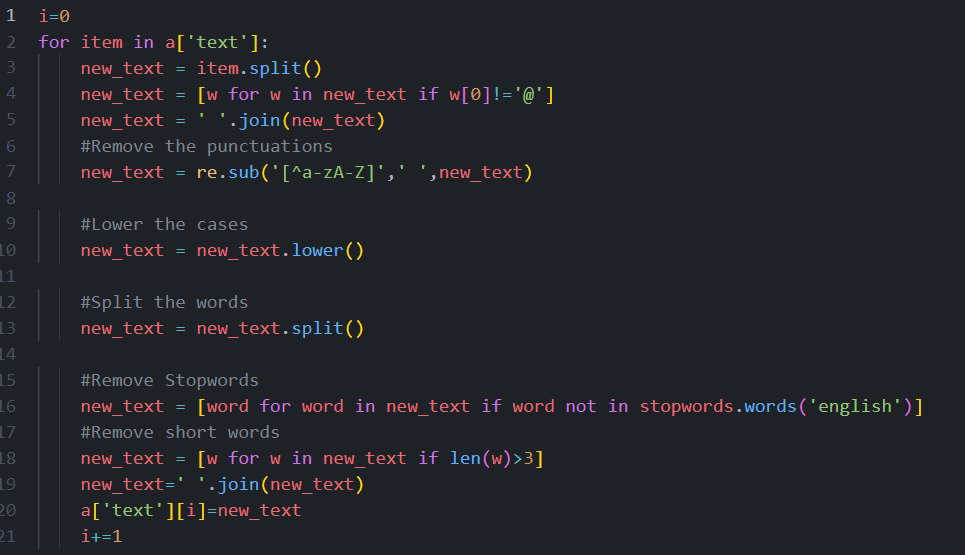

Let's look at the first few rows of the data set
At this point, the comparison of the data before and after cleaning is very obvious. Important words are left, and noisy content is eliminated.

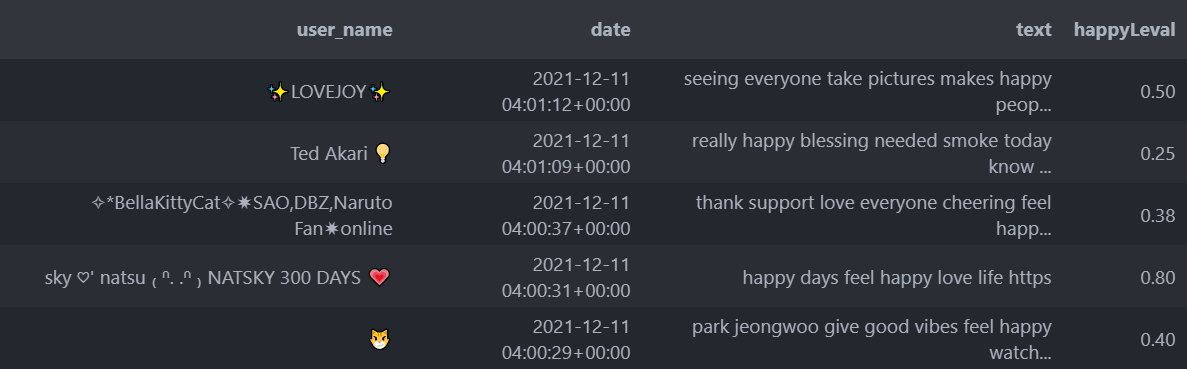

#### Classification of fun types（Sentiment Analysis with LSTMs）

Change to vector to use model to judge the happy type

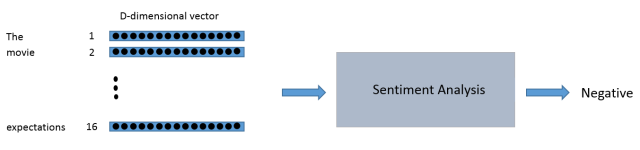

These vectors are created in a way that facilitates the representation of words and their context, meaning, and semantics.  For example, we want the vectors "love" and "worship" to reside in relatively identical regions of vector space

##### Word2Vec

In NLP, we usually use the Word2Vec package to quantify sentences, which is very good for word segmentation regardless of context

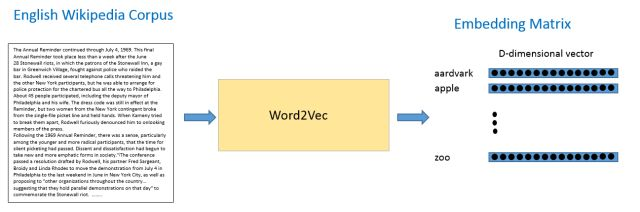

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import os
import pickle
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install openpyxl

In [ ]:
happy_data = pd.read_excel('../input/1233124/14.xlsx')
happy_data.head()

In [ ]:
new_data = happy_data

In [ ]:
preprocessed_text = []
happy_texts = new_data['text'].values.tolist()
for item in happy_texts:
    new_text = str(item).split()
    preprocessed_text.append(new_text)

In [ ]:
#Findout number of words in each sentences
num_words = []
for word in preprocessed_text:
  words = len(word)
  num_words.append(words)

In [ ]:
import gensim
#Define number of dimensions into which each word is vectorized
embedding_dim = 100

In [ ]:
w2v_model = gensim.models.Word2Vec(sentences=preprocessed_text,
                                   vector_size=embedding_dim,
                                   window=5,
                                   workers=4,
                                   min_count=1)

In [ ]:
w2v_model.wv.save_word2vec_format("happy_w2v.txt")

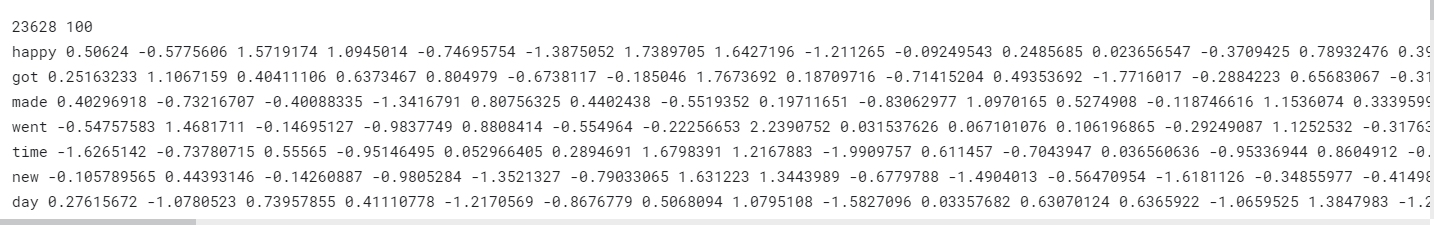

##### Train models from existing data sets

In [ ]:
import pandas as pd
cleaned_data=pd.read_csv('../input/happydb/cleaned_hm.csv')

Use Word2Vec to clean data

preview cleaned_data

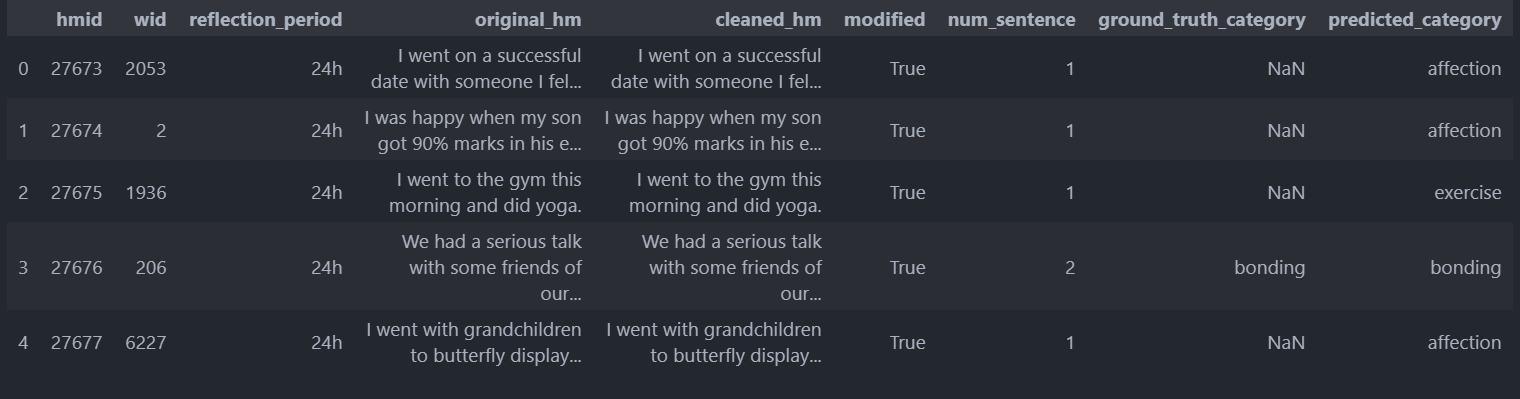

In [ ]:
new_data = happy_data[happy_data['num_sentence'] <= 10]

In [ ]:
#Encode the response variable
class_map = {
    "affection" : 0,
    "achievement"  : 1,       
    "bonding" : 2,    
    "enjoy_the_moment" : 3,     
    "leisure"  : 4,    
    "nature" : 5,    
    "exercise" : 6
}

In [ ]:
new_data['predicted_category'] = new_data['predicted_category'].map(class_map)

In [ ]:
#Findout number of words in each sentences
num_words = []
for word in preprocessed_text:
  words = len(word)
  num_words.append(words)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.initializers import Constant

In [ ]:
# Create a tokenizer object
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_text)

#Get index position of each unique word in preprocessed_text
word_index = tokenizer.word_index

#Convert the words in each sentence into its correponding index position
#each sentence will be encoded like [4,611,205,41,9566]
sequences = tokenizer.texts_to_sequences(preprocessed_text)

#Pad the sequences to be the same length.
max_length = 54
padded_data = pad_sequences(sequences=sequences,maxlen=max_length,padding='post')
labels = new_data['predicted_category'].values




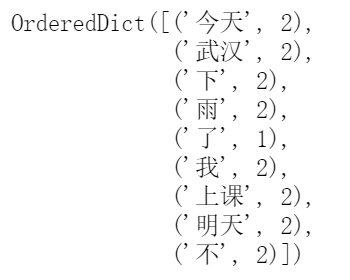

In [ ]:
indices = np.arange(padded_data.shape[0])

#Assign a seed for reproducibility
np.random.seed(99)
np.random.shuffle(indices)
padded_data = padded_data[indices]
labels = labels[indices]

In [ ]:
#Convert labels into a 1D matrix
max_label_no = np.max(labels) + 1
labels = np.eye(max_label_no)[labels]

In [ ]:
#Do 80-20 split
validation_ratio = 0.2
num_validation_samples = int(validation_ratio*padded_data.shape[0])

x_train = padded_data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = padded_data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of x_val:', x_val.shape)
print('Shape of y_val:', y_val.shape)

In [ ]:
#Load the embedded file into memory as a dictionary of word to embedding array.
embeddings_index = {}
f = open(os.path.join('', 'happy_w2v.txt'),  encoding = "utf-8")
for line in f:
  values = line.split()
  word = values[0]
  vec = np.asarray(values[1:])
  embeddings_index[word] = vec
f.close()

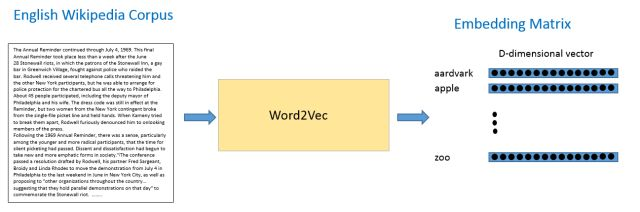

In [ ]:
#Use embedding_index dictionary and word_index to compute the embedding matrix:
input_dim = len(word_index)+1
embedding_matrix = np.zeros((input_dim,embedding_dim))

for word,i in word_index.items():
  if i > (len(word_index)+1):
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

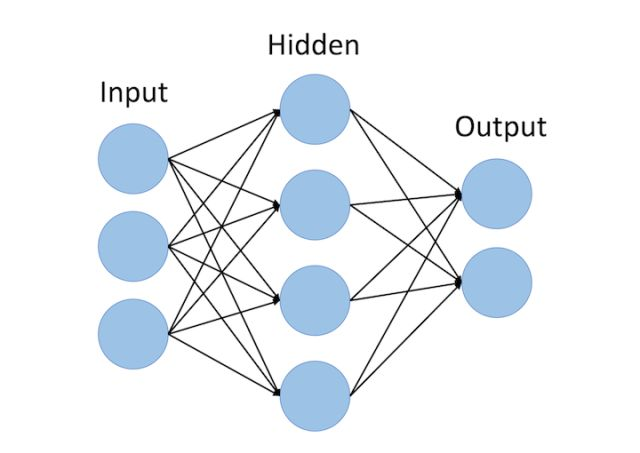

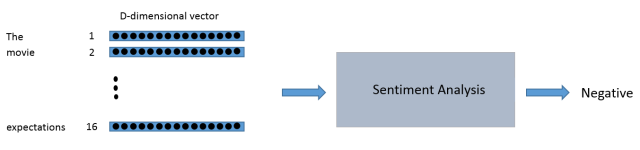

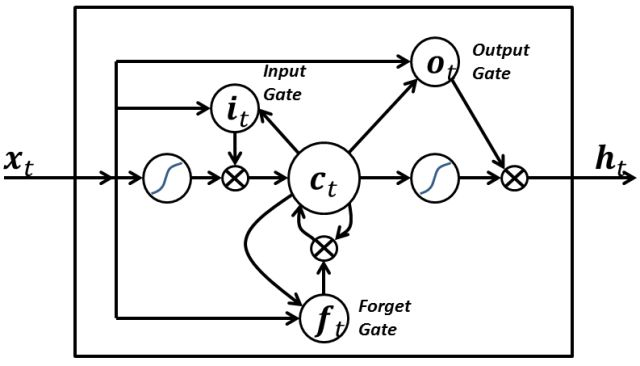

In [ ]:
model = Sequential()
embedding_layer = Embedding(input_dim=input_dim,
                            output_dim=embedding_dim,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length = max_length,
                            trainable=False
                            )
model.add(embedding_layer)
model.add(LSTM(units=80,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(units=7,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

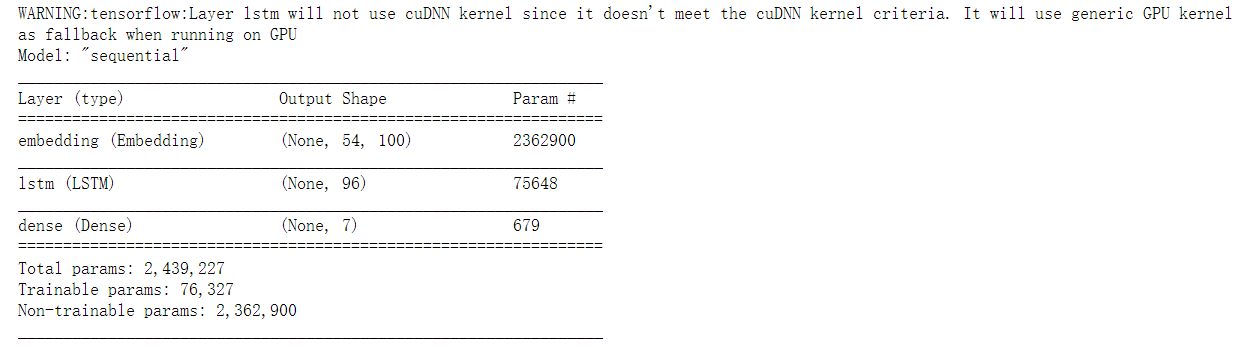

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath = 'lstm-model-weights-{epoch:03d}-{val_accuracy:03f}.h5'
checkpoint = ModelCheckpoint(filepath, verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_val, y_val), callbacks=callbacks_list)

In [ ]:
filepath = 'lstm-model-weights-022-0.875972.h5'
model = load_model(filepath=filepath)
model.summary()

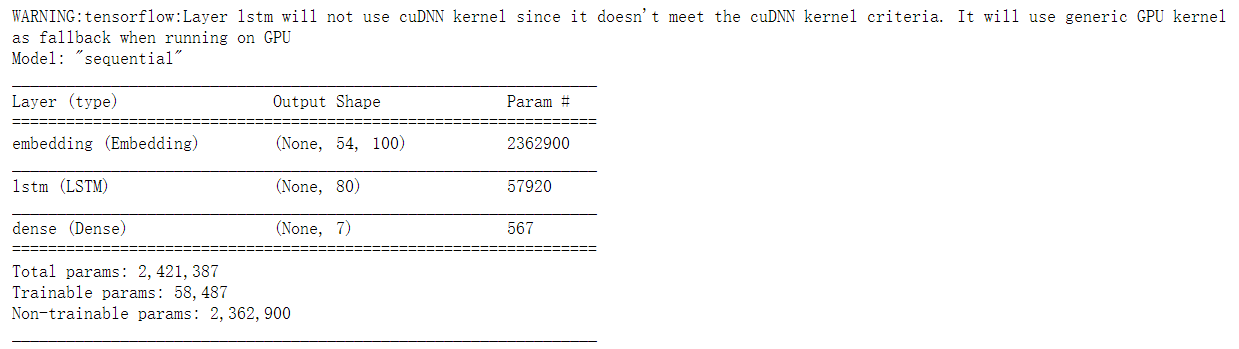

In [ ]:
#Prediction for a random single value
index_position = np.random.randint(len(y_val))
prediction = np.argmax(model.predict(x_val[index_position:index_position+1]),axis=-1)
predicted_matrix = np.eye(max_label_no)[prediction]
print('Actual Label:-',y_val[index_position:index_position+1])
print('Predicted Label:-',predicted_matrix)
print("----------")
for i,k in class_map.items():
  if k == np.argmax(y_val[index_position:index_position+1]):
    print("Acutal reason for happiness is {}".format(i))
  if k == prediction[0]:
    print("Predicted reason for happiness is {}".format(i))


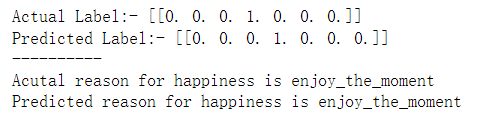

Use model in new file

In [ ]:
# Create a tokenizer object
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_text)

#Get index position of each unique word in preprocessed_text
word_index = tokenizer.word_index

#Convert the words in each sentence into its correponding index position
#each sentence will be encoded like [4,611,205,41,9566]
sequences = tokenizer.texts_to_sequences(preprocessed_text)

#Pad the sequences to be the same length.
max_length = 54
padded_data = pad_sequences(sequences=sequences,maxlen=max_length,padding='post')
# labels = new_data['predicted_category'].values




In [ ]:
indices = np.arange(padded_data.shape[0])

#Assign a seed for reproducibility
np.random.seed(99)
np.random.shuffle(indices)
padded_data = padded_data[indices]
# labels = labels[indices]

In [ ]:
#Load the embedded file into memory as a dictionary of word to embedding array.
embeddings_index = {}
f = open(os.path.join('', 'happy_w2v.txt'),  encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:])
    embeddings_index[word] = vec
f.close()

In [ ]:
#Use embedding_index dictionary and word_index to compute the embedding matrix:
input_dim = len(word_index)+1
embedding_matrix = np.zeros((input_dim,embedding_dim))

for word,i in word_index.items():
    if i > (len(word_index)+1):
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
filepath = '../input/chengpingdan/lstm-model-weights-024-0.874427.h5'
model = load_model(filepath=filepath)
model.summary()

In [ ]:
happy_data['predicted_category']=None

In [ ]:
#Prediction for a random single value

for g in range(len(happy_data['text'])):
    prediction=np.argmax(model.predict(padded_data[g:g+1]),axis=-1)
    predicted_matrix = np.eye(7)[prediction]
    for i,k in class_map.items():
    #     if k == np.argmax(y_val[index_position:index_position+1]):
    #         print("Acutal reason for happiness is {}".format(i))
        if k == prediction[0]:
            happy_data['predicted_category'][g]=i


In [ ]:
happy_data.to_excel('result.xlsx')

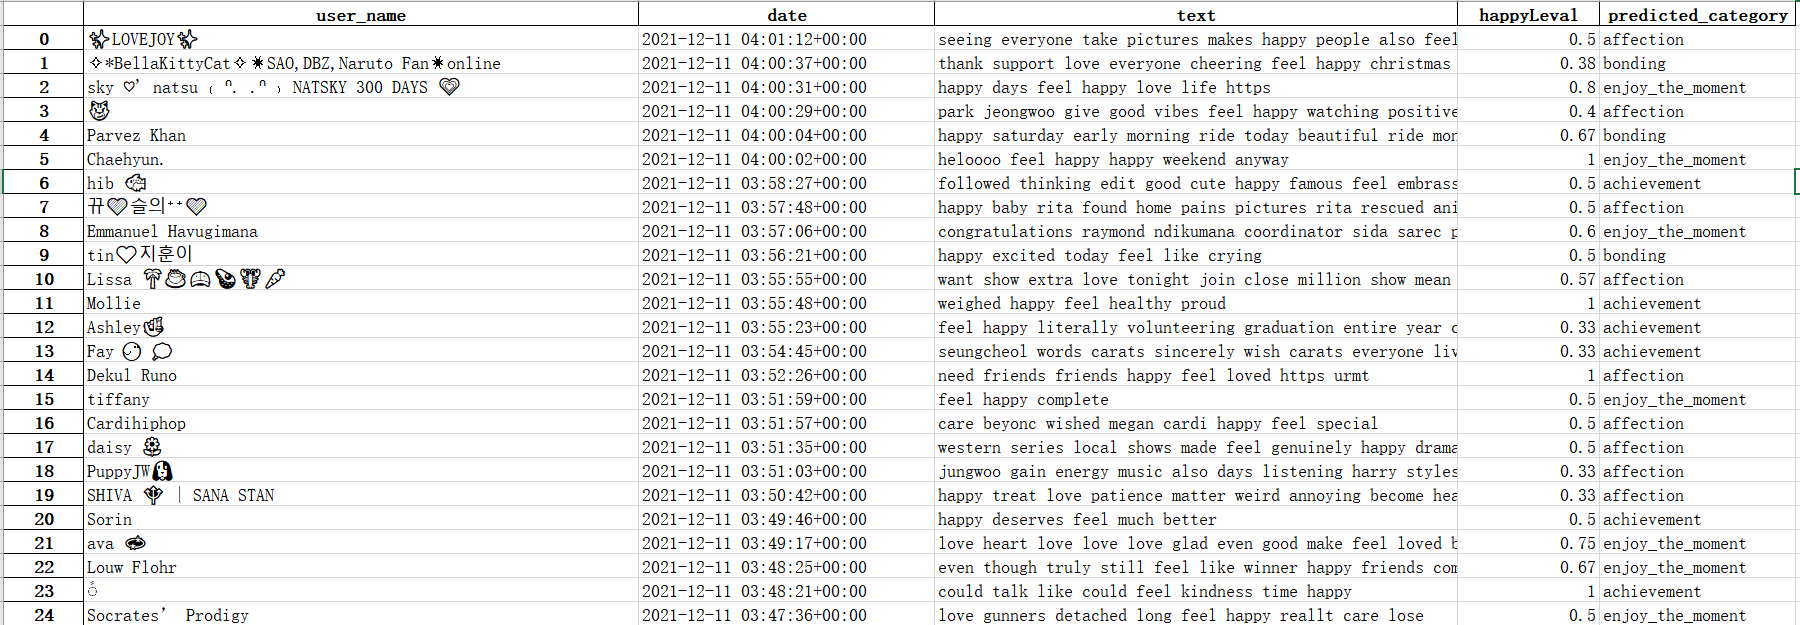